# Exploratory analysis of gas demand set

Load libraries

In [35]:
import pandas as pd
import os
import matplotlib as plt
import seaborn as sns

Load Dataset

In [5]:
gas_src = pd.read_csv("../data/raw/weather_and_gas_demand_historic_actuals.csv")

View head

In [6]:
gas_src.head()

dy  station_01_temperature_degrees_celcius  \
0  01/10/2013                                   10.32   
1  02/10/2013                                   10.35   
2  03/10/2013                                   11.67   
3  04/10/2013                                   13.19   
4  05/10/2013                                   12.49   

   station_02_temperature_degrees_celcius  station_01_wind_speed_m_per_s  \
0                                   11.58                           8.47   
1                                   11.54                           9.23   
2                                   13.28                          10.13   
3                                   15.27                          10.33   
4                                   14.17                           5.90   

   station_02_wind_speed_m_per_s  gas_demand_mcm  
0                           6.32           71.87  
1                           7.31           76.93  
2                           6.67           72.70  
3                           5.32           61.30  
4                           3.60           52.51

Rename Columns

In [8]:
gas_src.columns = ['day','s1_deg_c','s2_deg_c','s1_wind','s2_wind','gas_demand']

Convert day from text

In [10]:
gas_src['day'] = pd.to_datetime(gas_src['day'],format="%d/%m/%Y")

Are there any duplicate days?

In [15]:
gas_src[gas_src['day'].duplicated()]

Empty DataFrame
Columns: [day, s1_deg_c, s2_deg_c, s1_wind, s2_wind, gas_demand]
Index: []

No duplicates found

Set index to day

In [17]:
gas_src = gas_src.set_index('day')

Check missing calendar days - do they need imputing?

In [18]:
gas_src

s1_deg_c  s2_deg_c  s1_wind  s2_wind  gas_demand
day                                                         
2013-10-01     10.32     11.58     8.47     6.32       71.87
2013-10-02     10.35     11.54     9.23     7.31       76.93
2013-10-03     11.67     13.28    10.13     6.67       72.70
2013-10-04     13.19     15.27    10.33     5.32       61.30
2013-10-05     12.49     14.17     5.90     3.60       52.51
...              ...       ...      ...      ...         ...
2019-09-26     16.42     14.85    10.42     7.33       60.32
2019-09-27     17.21     15.62    11.55     9.18       55.47
2019-09-28     15.51     14.75    12.47    10.38       50.67
2019-09-29     16.70     15.68    15.29    13.84       56.26
2019-09-30     16.33     15.23    12.13     9.25       60.17

[2174 rows x 5 columns]

In [20]:
pd.date_range(start = gas_src.first_valid_index(), end = gas_src.last_valid_index() ).difference(gas_src.index)

DatetimeIndex(['2013-11-04', '2013-11-19', '2013-11-20', '2013-12-30',
               '2013-12-31', '2014-03-29', '2014-03-30', '2014-11-03',
               '2014-12-30', '2014-12-31', '2015-03-28', '2015-03-29',
               '2015-07-17', '2015-07-18', '2016-03-26', '2017-03-25',
               '2018-03-24'],
              dtype='datetime64[ns]', freq=None)

So there are 16 missing days in the part of the source data used for prediction

Check Numbers of Rows and description

In [21]:
gas_src.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2174 entries, 2013-10-01 to 2019-09-30
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   s1_deg_c    2169 non-null   float64
 1   s2_deg_c    2172 non-null   float64
 2   s1_wind     2173 non-null   float64
 3   s2_wind     2172 non-null   float64
 4   gas_demand  2170 non-null   float64
dtypes: float64(5)
memory usage: 101.9 KB


In [22]:
gas_src.describe()

s1_deg_c     s2_deg_c      s1_wind      s2_wind   gas_demand
count  2169.000000  2172.000000  2173.000000  2172.000000  2170.000000
mean     11.572158    11.112224     8.297395     6.524429    89.276032
std       6.490849     6.524763     3.219184     2.509341    51.085797
min      -7.300000    -6.070000     2.530000     1.840000    24.640000
25%       6.250000     5.747500     6.020000     4.750000    41.572500
50%      11.080000    10.970000     7.680000     6.080000    76.355000
75%      16.970000    16.422500     9.910000     7.682500   131.017500
max      29.210000    28.130000    22.190000    18.870000   270.690000

In [24]:
gas_src[gas_src['gas_demand'] < 30]

s1_deg_c  s2_deg_c  s1_wind  s2_wind  gas_demand
2014-06-08     21.02     22.37     4.64     4.88       27.23
2014-06-09     23.03     22.84     6.14     5.75       29.39
2014-07-06     19.89     19.90     8.83     8.39       29.08
2014-07-13     18.80     17.84     6.41     5.43       29.90
2014-07-19       NaN     26.12     6.60     5.95       25.33
...              ...       ...      ...      ...         ...
2019-07-27     20.82     19.62     6.82     6.01       28.87
2019-07-28     19.80     17.36     8.48     5.80       27.16
2019-08-03     18.28     17.33     6.23     3.47       28.63
2019-08-04     21.25     20.69     4.85     4.17       27.42
2019-08-10     21.84     20.73    16.18    11.51       29.53

[71 rows x 5 columns]

In [27]:
gas_src['gas_demand'].resample('Y').sum()

2013-12-31     9695.94
2014-12-31    28872.38
2015-12-31    31766.27
2016-12-31    33325.59
2017-12-31    33897.01
2018-12-31    33782.10
2019-12-31    22389.70
Freq: A-DEC, Name: gas_demand, dtype: float64

There are 2174 rows as expected from looking at the text file. However there are some missing values, which will need imputing for the prediction. There are no anomalous values - wind from 1.4 to 22.2 m/s is plausible, similarly temperatures from - 7 to 29 
The gas demand also looks plausible.

Insert rows for missing dates

In [23]:
alldays = pd.date_range(start = gas_src.first_valid_index(), end = gas_src.last_valid_index() )
gas_src = gas_src.reindex(alldays)

Visualize the data


array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>], dtype=object)

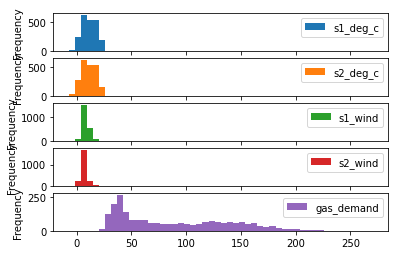

In [33]:
gas_src.plot(kind='hist', subplots=True, bins=50)

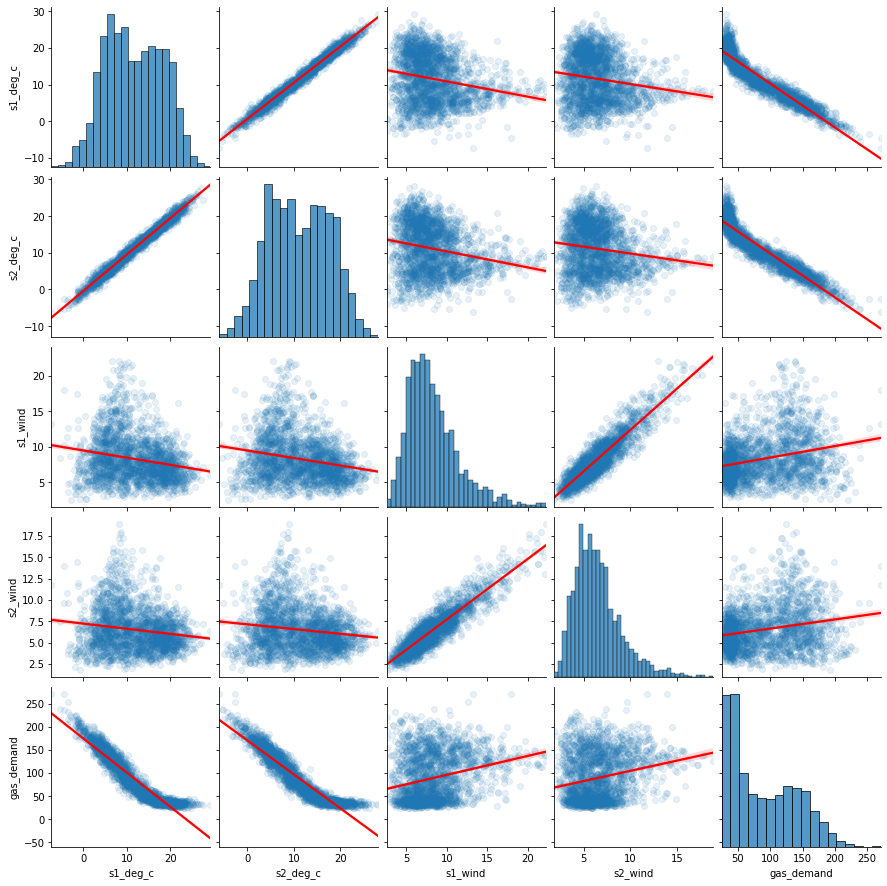

In [37]:

sns.pairplot(gas_src,  kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

Create in sample data set. 
Assuming there is no 2018 or later data and thus the forecast is to be made as at end 2017

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

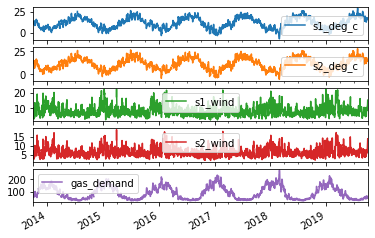

In [38]:
gas_src.plot(kind='line', subplots=True)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

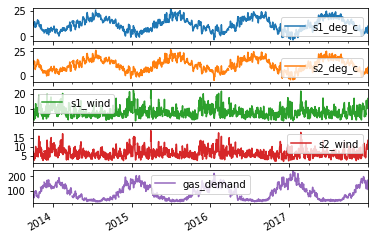

In [40]:
gas_src['2013-10-01':'2017-12-31' ].plot(kind='line', subplots=True)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

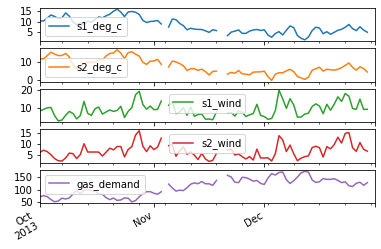

In [50]:
gas_src['2013-10-01':'2013-12-31' ].plot(kind='line', subplots=True)


Impute missing data - using pandas time series interpolation

In [55]:
gas_src = gas_src.apply(lambda x: x.interpolate(method='time'), axis=0)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

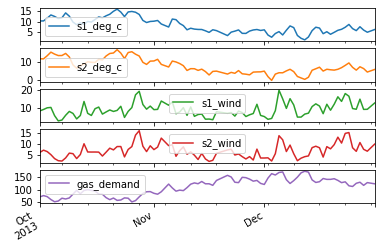

In [56]:
gas_src['2013-10-01':'2013-12-31' ].plot(kind='line', subplots=True)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

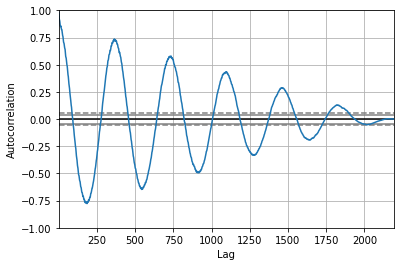

In [58]:
pd.plotting.autocorrelation_plot(gas_src['gas_demand'])

In [ ]:
The winter summer seasonality is clearly visible